## Download and prepare the dataset

In [ ]:
import numpy as np
import shutil
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import glob

useful links for training yolo:

https://machinelearningprojects.net/train-yolov7-on-the-custom-dataset/#Step_3_%E2%80%93_Let%E2%80%99s_Prepare_the_data

https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov7-object-detection-on-custom-data.ipynb

In [ ]:
!cd /content/
# !pip install gdown
! gdown --id 1KWnX3eMPJrzhsegi0LmyGUbUV5pqKw_R
!unzip ss_dataset.zip -d .
!pwd
# /content/ss_dataset/0/0.bpm 0_label.bmp ... /content/ss_dataset/5/118.bmp /content/ss_dataset/5/118_label.bmp

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KWnX3eMPJrzhsegi0LmyGUbUV5pqKw_R
To: /content/ss_dataset.zip
100% 5.59G/5.59G [00:41<00:00, 134MB/s]
Archive:  ss_dataset.zip
   creating: ./ss_dataset/
   creating: ./ss_dataset/3/
  inflating: ./ss_dataset/3/210.bmp  
  inflating: ./ss_dataset/3/65_label.bmp  
  inflating: ./ss_dataset/3/495.bmp  
  inflating: ./ss_dataset/3/266.bmp  
  inflating: ./ss_dataset/3/423_label.bmp  
  inflating: ./ss_dataset/3/518_label.bmp  
  inflating: ./ss_dataset/3/540_label.bmp  
  inflating: ./ss_dataset/3/423.bmp  
  inflating: ./ss_dataset/3/221.bmp  
  inflating: ./ss_dataset/3/391.bmp  
  inflating: ./ss_dataset/3/309_label.bmp  
  inflating: ./ss_dataset/3/70.bmp   
  inflating: ./ss_dataset/3/231.bmp  
  inflating: ./ss_dataset/

In [ ]:
root_dir = '/content/ss_dataset'

data_dir = os.path.join(root_dir)

image_root = '/content/train'
label_root = '/content/train_masks'
if not os.path.isdir(image_root):
    os.mkdir(image_root)
if not os.path.isdir(label_root):
    os.mkdir(label_root)

images = list()
labels = list()

'''
Iterate the whole dataset and aggregate the files as png image file in train and train_masks
directories
'''

################################################
############## YOUR CODES GO HERE ##############
# for img_id in range(1, 501):
#     img_path = os.path.join(data_dir, f"{img_id}.png")
#     mask_path = os.path.join(data_dir, f"{img_id}_mask.png")
#     shutil.copy2(img_path, image_root)
#     shutil.copy2(mask_path, label_root)

# img_size = 256
# img_size = 608
img_size = 640
for root, dirs, files in os.walk(data_dir):
    # print(root) # /content/ss_dataset , /content/ss_dataset/0
    # print(dirs) # ['0', '4', '5', '3', '1', '2'] , []
    # print(files) # [] , ['382_label.bmp', '344.bmp', '401_label.bmp' , ... ]
    for file in files:
        # print(file) # 382_label.bmp
        if file.endswith('_label.bmp'):
            labels.append(os.path.join(root, file))
        elif file.endswith('.bmp'):
            images.append(os.path.join(root, file))
        # break

for image in images:
    img = Image.open(image)
    img = img.resize((img_size, img_size))
    img.save(os.path.join(image_root, image.split('/')[-2] + "_" + image.split('/')[-1].split('.')[0] + '.png'))
    # print(image) # /content/ss_dataset/1/344.bmp

for label in labels:
    img = Image.open(label)
    img = img.resize((img_size, img_size))
    img.save(os.path.join(label_root, label.split('/')[-2] + "_" + label.split('/')[-1].split('.')[0] + '.png'))
    # print(label) # /content/ss_dataset/0/382_label.bmp

################################################

In [ ]:
print("Train set:  ", len(os.listdir("/content/train")))
print("Train masks:", len(os.listdir("/content/train_masks")))

Train set:   2308
Train masks: 2308


In [ ]:
'''
Create yolo-based labels for each image.
Consider the routine describes in the question.
Don't forget to split the dataset to train and val
Hint:
  https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/
  https://docs.opencv.org/4.x/da/d0c/tutorial_bounding_rects_circles.html
'''

# # Create train and validation splits
# image_files = glob.glob(os.path.join(data_dir, '*.jpg'))
# np.random.shuffle(image_files)
# train_split = int(0.8 * len(image_files))
# train_files = image_files[:train_split]
# val_files = image_files[train_split:]

################################################
############## YOUR CODES GO HERE ##############
def create_yolo_labels(image_root, label_root):
    # image_root = '/content/train'
    # label_root = '/content/train_masks'
    for img_file in glob.glob(os.path.join(image_root, '*.png')):
    # for img_file in glob.glob(os.path.join(label_root, '*.png')):
        # Read image and find contours
        img = cv2.imread(img_file) # print(img_file) # /content/train/0_658.png
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        mask_file = os.path.join(label_root, os.path.basename(img_file).replace('.png', '_label.png')) # print(mask_file) # /content/train_masks/0_658_label.png
        mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # edged = cv2.Canny(mask, 30, 200)
        # contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Create label file
        # label_file = os.path.join(label_root, os.path.basename(img_file).replace('.png', '.txt'))
        label_file = os.path.join(image_root, os.path.basename(img_file).replace('.png', '.txt'))
        with open(label_file, 'w') as f:
            for cnt in contours:
                x, y, w, h = cv2.boundingRect(cnt)
                x_center = (x + w / 2) / img.shape[1]
                y_center = (y + h / 2) / img.shape[0]
                w_norm = w / img.shape[1]
                h_norm = h / img.shape[0]
                class_id = 0  # Only one class: solar panel
                f.write(f"{class_id} {x_center} {y_center} {w_norm} {h_norm}\n")


create_yolo_labels(image_root, label_root)
################################################

In [ ]:
!ls train/*.png | wc -l

2308


In [ ]:
!ls train/*.txt | wc -l
# !ls train_masks/*.txt | wc -l

2308


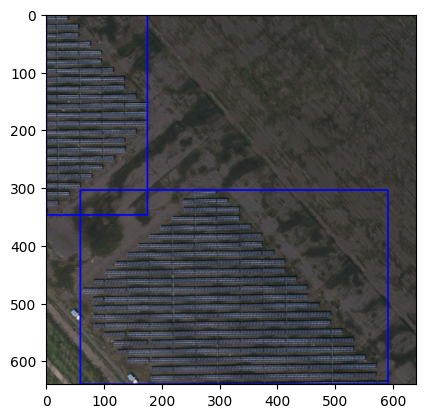

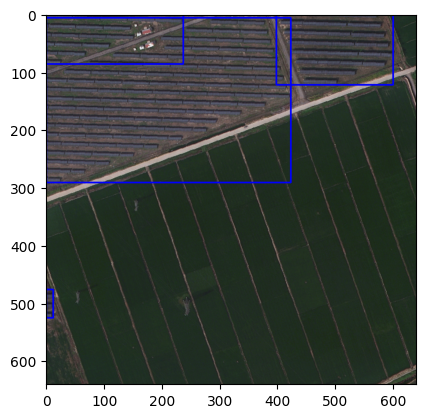

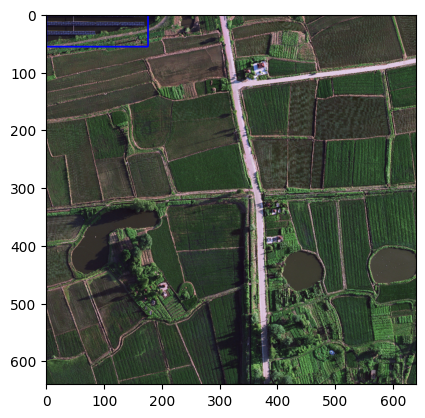

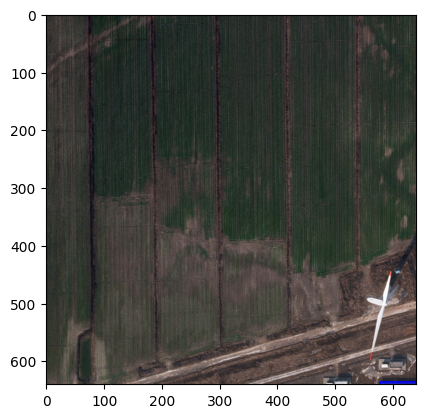

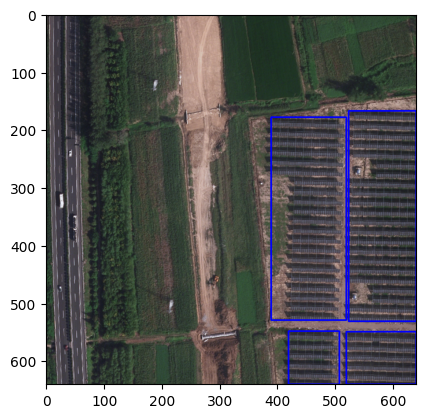

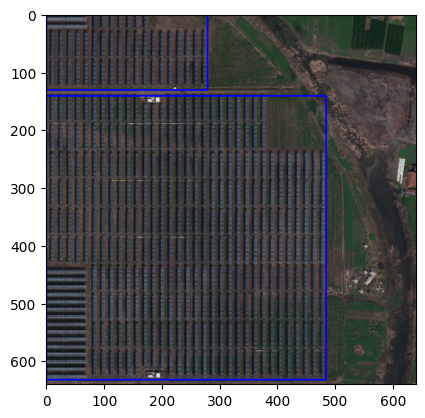

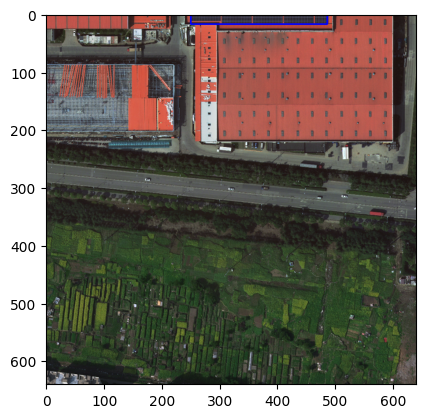

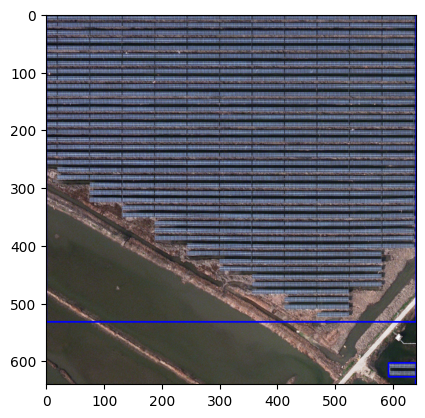

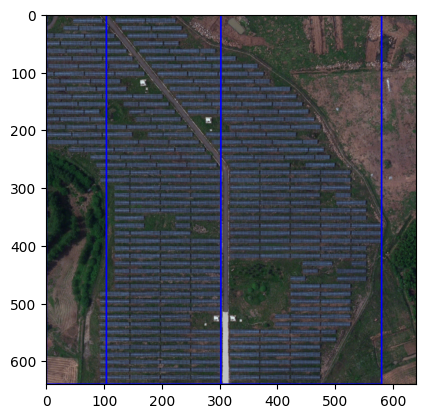

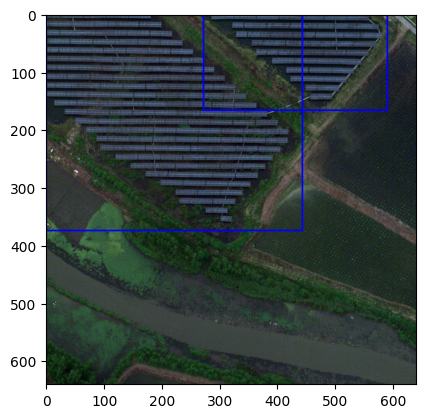

In [ ]:
def plot_bbox_on_img(rect, img):
    '''
    draw the rects around objects and show the result
    '''
    ################################################
    ############## YOUR CODES GO HERE ##############
    img = cv2.imread(img)
    with open(rect, 'r') as f:
        lines = f.readlines()
        for line in lines:
            class_id, x_center, y_center, w_norm, h_norm = map(float, line.strip().split())
            x_center *= img.shape[1]
            y_center *= img.shape[0]
            w = w_norm * img.shape[1]
            h = h_norm * img.shape[0]
            x = int(x_center - w / 2)
            y = int(y_center - h / 2)
            cv2.rectangle(img, (x, y), (x + int(w), y + int(h)), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # imgfile = ...
    # plt.imshow(imgfile)
    # plt.show()
    ################################################

base_path = 'train'
txtsPath = 'train'

txts = glob.glob(os.path.join(txtsPath, '*.txt'))

for txt in txts[:10]:
    plot_bbox_on_img(txt, os.path.join(base_path, '{}.png'.format(txt.split('/')[-1].split('.')[0])))

## Train the model

In [15]:
# from sklearn.model_selection import train_test_split

# # Split the dataset into train and validation sets
# train, valid = train_test_split(image_paths, test_size=0.2, random_state=42)


# import shutil
# for image_path in image_paths:
#   # Get filename without extension
#   filename = os.path.splitext(os.path.basename(image_path))[0]
#   print(filename)
#   # copy label in dest yolo label folder
#   destination_label = os.path.join(image_root, filename+".txt")
#   print(os.path.join(label_root,filename+"_label.png"))
#   label_path = os.path.join(label_root,filename+"_label.png")
#   create_yolo_labels(image_path,destination_label)



import random

# preparing the folder structure

# image_root = '/content/train'
full_data_path = '/content/train/'
# full_data_path = '/content/dataset/images_txts/'
extension_allowed = '.png'
split_percentage = 90

dataset_root = '/content/dataset/'
if not os.path.isdir(dataset_root):
    os.mkdir(dataset_root)

images_path = '/content/dataset/images/'
if os.path.exists(images_path):
    shutil.rmtree(images_path)
os.mkdir(images_path)

labels_path = '/content/dataset/labels/'
if os.path.exists(labels_path):
    shutil.rmtree(labels_path)
os.mkdir(labels_path)

training_images_path = images_path + 'training/'
validation_images_path = images_path + 'validation/'
training_labels_path = labels_path + 'training/'
validation_labels_path = labels_path +'validation/'

os.mkdir(training_images_path)
os.mkdir(validation_images_path)
os.mkdir(training_labels_path)
os.mkdir(validation_labels_path)

files = []

ext_len = len(extension_allowed)

for r, d, f in os.walk(full_data_path):
    for file in f:
        if file.endswith(extension_allowed):
            strip = file[0:len(file) - ext_len]
            files.append(strip)

random.shuffle(files)

size = len(files)

split = int(split_percentage * size / 100)

print("copying training data...")
for i in range(split):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    # print(strip)
    # print(src_image)
    shutil.copy(src_image, training_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    # print(strip)
    # print(src_label)
    shutil.copy(src_label, training_labels_path)

print("copying validation data...")
for i in range(split, size):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, validation_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, validation_labels_path)


copying training data...
copying validation data...


In [16]:
#### Clone the codes from repo: https://github.com/WongKinYiu/yolov7.git
#### Read the readme file
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
# !cat README.md
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1191, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1191 (delta 2), reused 6 (delta 2), pack-reused 1185
Receiving objects: 100% (1191/1191), 74.22 MiB | 4.29 MiB/s, done.
Resolving deltas: 100% (513/513), done.
/content/yolov7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00


In [17]:
!gdown https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

Downloading...
From: https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
To: /content/yolov7/yolov7.pt
100% 75.6M/75.6M [00:04<00:00, 16.0MB/s]


In [23]:
!python3 /content/yolov7/train.py --weights /content/yolov7/yolov7.pt --data /content/dataset.yaml  --workers 4 --batch-size 4 --img 640  --epochs 10

2023-07-08 22:00:19.650550: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-08 22:00:20.529156: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='/content/yolov7/yolov7.pt', cfg='', data='/content/dataset.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=10, batch_size=4, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=4, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_l

In [19]:
!pwd

/content/yolov7


## Inference the trained model

In [25]:
# ! python /content/yolov7/detect.py --weights /content/yolov7/yolov7.pt --conf 0.25 --img-size 640 --source /content/yolov7/inference/images/bus.jpg
! python /content/yolov7/detect.py --weights /content/yolov7/yolov7.pt --conf 0.25 --img-size 640 --source /content/dataset/images/validation/0_106.png

Namespace(weights=['/content/yolov7/yolov7.pt'], source='/content/dataset/images/validation/0_106.png', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Done. (22

In [ ]:
# ### Show the results

# # !python /workspace/yolov7/detect.py --weights '/workspace/yolov7/runs/train/yolov7-asl/weights/best.pt' --conf 0.25 --img-size 416 --source '/workspace/images' --name yolov7-asl-detect

# ################################################
# ############## YOUR CODES GO HERE ##############
# trained_weights = "backup/yolov7-tiny-solar_final.weights"  # Replace with the path to your trained weights
# cfg_file = "cfg/yolov7-tiny-solar.cfg"
# data_file = "data/obj.data"
# #
# for img_path in glob.glob(os.path.join(image_root, "*.png"))[1846:]:
#     # Perform detection
#     !./darknet detector test {data_file} {cfg_file} {trained_weights} {img_path} -dont_show

#     # Show the result
#     result_img = cv2.imread("predictions.jpg")
#     plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
#     plt.show()
# ################################################